In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest


mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('/content/dfVnavg_V_Hourly.csv')
df.head()

,Time,Vnavg_V
0,2021-01-02 19:00:00,240.609217
1,2021-01-02 20:00:00,242.816783
2,2021-01-02 21:00:00,241.642667
3,2021-01-02 22:00:00,242.809217
4,2021-01-02 23:00:00,241.877150


In [57]:
df['Vnavg_V'].fillna(df.Vnavg_V.mean(), inplace=True)

In [58]:
df['Time'] = pd.to_datetime(df['Time'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     20401 non-null  datetime64[ns]
 1   Vnavg_V  20401 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 318.9 KB


,Time,Vnavg_V
0,2021-01-02 19:00:00,240.609217
1,2021-01-02 20:00:00,242.816783
2,2021-01-02 21:00:00,241.642667
3,2021-01-02 22:00:00,242.809217
4,2021-01-02 23:00:00,241.877150


In [59]:
dfi = df.set_index('Time')
df

,Time,Vnavg_V
0,2021-01-02 19:00:00,240.609217
1,2021-01-02 20:00:00,242.816783
2,2021-01-02 21:00:00,241.642667
3,2021-01-02 22:00:00,242.809217
4,2021-01-02 23:00:00,241.877150
...,...,...
20396,2023-05-02 15:00:00,235.497283
20397,2023-05-02 16:00:00,233.516883
20398,2023-05-02 17:00:00,236.922617
20399,2023-05-02 18:00:00,236.840750


In [60]:
fig = px.line(dfi.reset_index(), x ='Time', y='Vnavg_V', title='Vnavg_V')

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [61]:
df['hour'] = df.Time.dt.hour

In [62]:
 df['weekday']=pd.Categorical(df.Time.dt.strftime('%A'), categories=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'
 ])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     20401 non-null  datetime64[ns]
 1   Vnavg_V  20401 non-null  float64       
 2   hour     20401 non-null  int64         
 3   weekday  17473 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 498.4 KB


<Axes: xlabel='hour'>

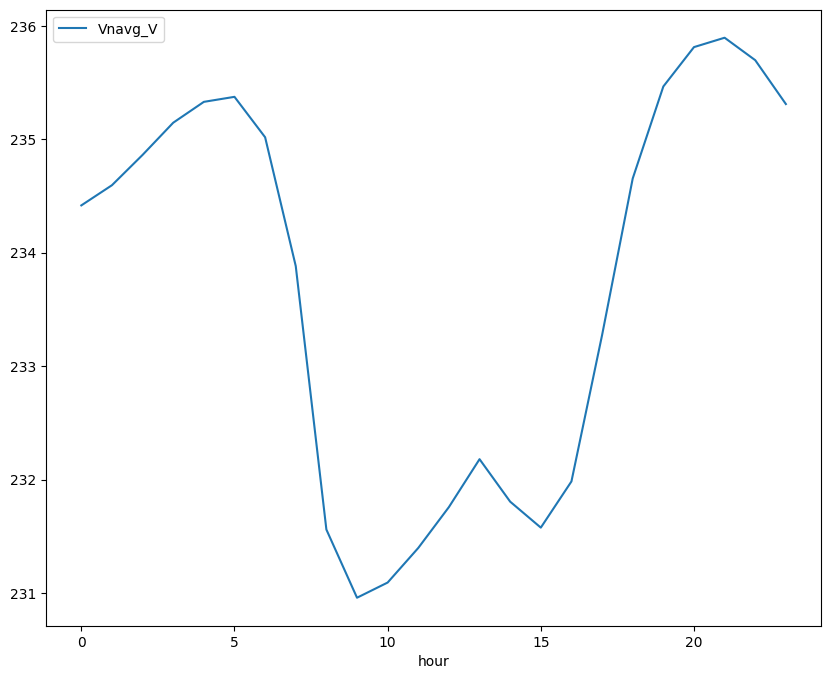

In [64]:
df[['Vnavg_V','hour']].groupby('hour').mean().plot()

<Axes: xlabel='weekday'>

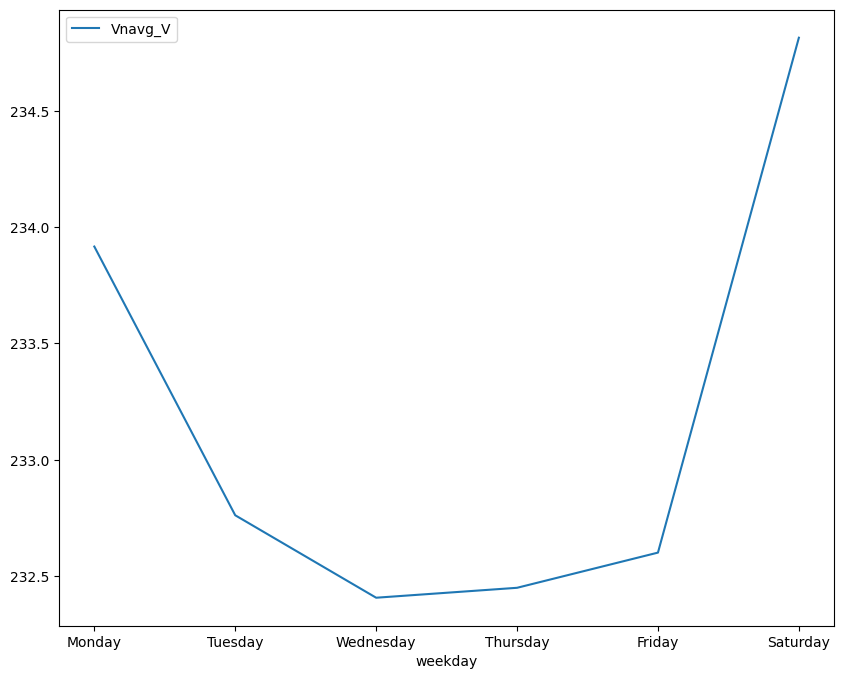

In [65]:
df[['Vnavg_V','weekday']].groupby('weekday').mean().plot()


<Axes: xlabel='hour'>

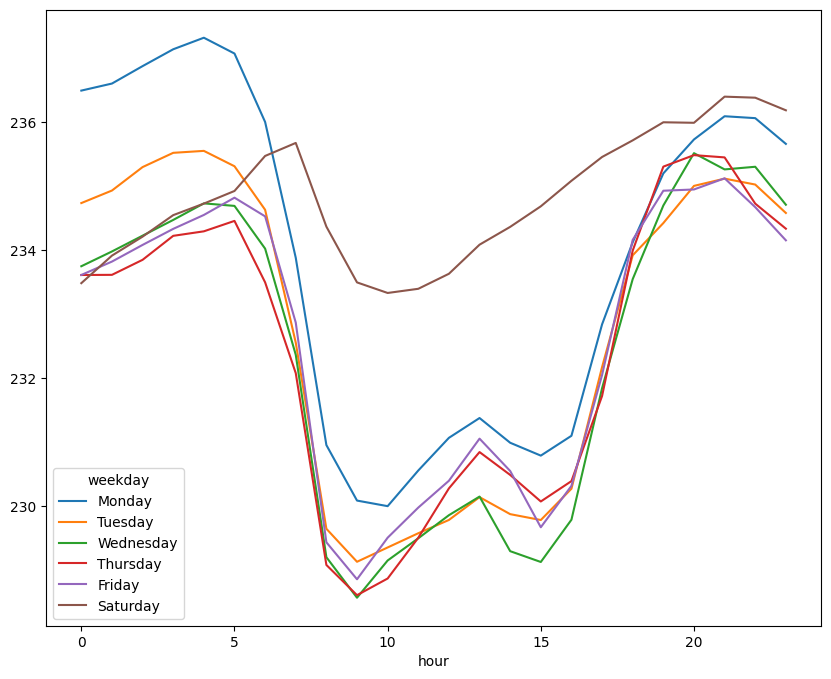

In [66]:
df.groupby(['hour','weekday']).mean()['Vnavg_V'].unstack().plot()

In [67]:
df.join(df.groupby(['hour','weekday'])['Vnavg_V'].mean(), on=['hour','weekday'], rsuffix='_avg')

,Time,Vnavg_V,hour,weekday,Vnavg_V_avg
0,2021-01-02 19:00:00,240.609217,19,Saturday,235.995812
1,2021-01-02 20:00:00,242.816783,20,Saturday,235.987847
2,2021-01-02 21:00:00,241.642667,21,Saturday,236.395942
3,2021-01-02 22:00:00,242.809217,22,Saturday,236.379612
4,2021-01-02 23:00:00,241.877150,23,Saturday,236.182777
...,...,...,...,...,...
20396,2023-05-02 15:00:00,235.497283,15,Tuesday,229.785887
20397,2023-05-02 16:00:00,233.516883,16,Tuesday,230.274340
20398,2023-05-02 17:00:00,236.922617,17,Tuesday,232.173650
20399,2023-05-02 18:00:00,236.840750,18,Tuesday,233.918714


In [68]:
df_final = df.join(df.groupby(['hour','weekday'])['Vnavg_V'].mean(), on=['hour','weekday'], rsuffix='_avg')

In [71]:
df_final['day']=df.Time.dt.weekday

In [72]:
df_final

,Time,Vnavg_V,hour,weekday,Vnavg_V_avg,day
0,2021-01-02 19:00:00,240.609217,19,Saturday,235.995812,5
1,2021-01-02 20:00:00,242.816783,20,Saturday,235.987847,5
2,2021-01-02 21:00:00,241.642667,21,Saturday,236.395942,5
3,2021-01-02 22:00:00,242.809217,22,Saturday,236.379612,5
4,2021-01-02 23:00:00,241.877150,23,Saturday,236.182777,5
...,...,...,...,...,...,...
20396,2023-05-02 15:00:00,235.497283,15,Tuesday,229.785887,1
20397,2023-05-02 16:00:00,233.516883,16,Tuesday,230.274340,1
20398,2023-05-02 17:00:00,236.922617,17,Tuesday,232.173650,1
20399,2023-05-02 18:00:00,236.840750,18,Tuesday,233.918714,1


In [73]:
data = df_final[['Vnavg_V', 'hour','day']]

In [74]:
# data['Vnavg_V'].fillna(data.Vnavg_V.mean(), inplace = True)

In [75]:
model = IsolationForest(contamination=0.005, max_features=3, max_samples=0.8, n_estimators=200)

In [76]:
model.fit(data)

IsolationForest(contamination=0.005, max_features=3, max_samples=0.8,
                n_estimators=200)

In [77]:
df_final['outliers'] = pd.Series(model.predict(data)).apply(lambda x:'yes' if (x== -1) else 'no')

In [85]:
df_final.query('outliers=="yes"')

,Time,Vnavg_V,hour,weekday,Vnavg_V_avg,day,outliers,scores
99,2021-01-06 22:00:00,260.638900,22,Wednesday,235.301199,2,yes,-0.056233
100,2021-01-06 23:00:00,256.013667,23,Wednesday,234.708541,2,yes,-0.042414
101,2021-01-07 00:00:00,254.212383,0,Thursday,233.611389,3,yes,-0.038986
102,2021-01-07 01:00:00,253.055233,1,Thursday,233.613814,3,yes,-0.010026
103,2021-01-07 02:00:00,253.885033,2,Thursday,233.848368,3,yes,-0.003310
...,...,...,...,...,...,...,...,...
18134,2023-01-28 09:00:00,251.287250,9,Saturday,233.495830,5,yes,-0.010141
20357,2023-05-01 00:00:00,226.085138,0,Monday,236.490484,0,yes,-0.005683
20358,2023-05-01 01:00:00,219.659683,1,Monday,236.600511,0,yes,-0.054900
20359,2023-05-01 02:00:00,219.721450,2,Monday,236.872581,0,yes,-0.051332


In [86]:
fig = px.scatter(df_final.reset_index(), x ='Time', y='Vnavg_V',color='outliers', hover_data=['weekday','hour','Vnavg_V_avg'], title='Vnavg_V')

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [87]:
score = model.decision_function(data)

In [88]:
score

array([0.14615634, 0.12139445, 0.13897517, ..., 0.1675951 , 0.17320626,
       0.17484254])

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 7.000e+00, 3.000e+00,
        1.400e+01, 1.000e+01, 1.700e+01, 3.500e+01, 2.200e+01, 2.300e+01,
        2.600e+01, 2.600e+01, 4.600e+01, 5.800e+01, 6.100e+01, 9.300e+01,
        1.220e+02, 1.260e+02, 1.930e+02, 2.150e+02, 2.420e+02, 3.230e+02,
        4.400e+02, 5.680e+02, 6.510e+02, 8.180e+02, 9.230e+02, 1.264e+03,
        1.702e+03, 1.762e+03, 1.954e+03, 2.203e+03, 2.141e+03, 1.979e+03,
        1.614e+03, 6.990e+02]),
 array([-0.16351053, -0.15601913, -0.14852772, -0.14103632, -0.13354491,
        -0.12605351, -0.11856211, -0.1110707 , -0.1035793 , -0.0960879 ,
        -0.08859649, -0.08110509, -0.07361368, -0.06612228, -0.05863088,
        -0.05113947, -0.04364807, -0.03615666, -0.02866526, -0.02117386,
        -0.01368245, -0.00619105,  0.00130036,  0.00879176,  0.01628316,
         0.

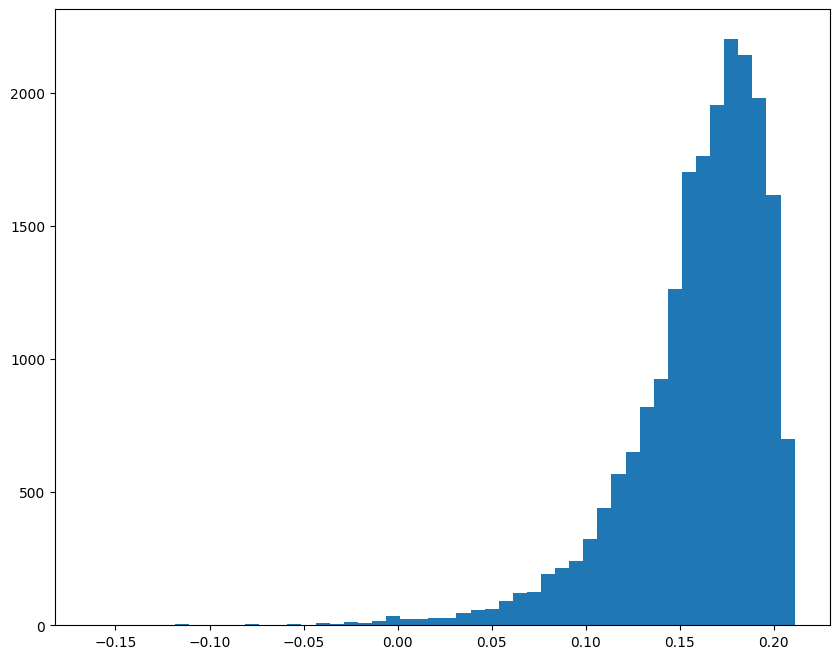

In [89]:
plt.hist(score,bins=50)

In [90]:
df_final['scores'] = score

In [91]:
df_final

,Time,Vnavg_V,hour,weekday,Vnavg_V_avg,day,outliers,scores
0,2021-01-02 19:00:00,240.609217,19,Saturday,235.995812,5,no,0.146156
1,2021-01-02 20:00:00,242.816783,20,Saturday,235.987847,5,no,0.121394
2,2021-01-02 21:00:00,241.642667,21,Saturday,236.395942,5,no,0.138975
3,2021-01-02 22:00:00,242.809217,22,Saturday,236.379612,5,no,0.111747
4,2021-01-02 23:00:00,241.877150,23,Saturday,236.182777,5,no,0.090600
...,...,...,...,...,...,...,...,...
20396,2023-05-02 15:00:00,235.497283,15,Tuesday,229.785887,1,no,0.165747
20397,2023-05-02 16:00:00,233.516883,16,Tuesday,230.274340,1,no,0.192300
20398,2023-05-02 17:00:00,236.922617,17,Tuesday,232.173650,1,no,0.167595
20399,2023-05-02 18:00:00,236.840750,18,Tuesday,233.918714,1,no,0.173206


In [92]:
df_final.query('scores<-0.06')

,Time,Vnavg_V,hour,weekday,Vnavg_V_avg,day,outliers,scores
2155,2021-04-02 14:00:00,257.439767,14,Friday,230.551455,4,yes,-0.069527
2258,2021-04-06 21:00:00,269.093467,21,Tuesday,235.115923,1,yes,-0.111997
2259,2021-04-06 22:00:00,262.757133,22,Tuesday,235.023523,1,yes,-0.076637
2260,2021-04-06 23:00:00,258.771000,23,Tuesday,234.579667,1,yes,-0.077753
3120,2021-05-12 19:00:00,261.119217,19,Wednesday,234.696481,2,yes,-0.068983
6596,2021-10-04 15:00:00,210.092367,15,Monday,230.791378,0,yes,-0.075497
6772,2021-10-11 23:00:00,280.354350,23,Monday,235.658458,0,yes,-0.163511
6773,2021-10-12 00:00:00,282.135217,0,Tuesday,234.734451,1,yes,-0.142538
6774,2021-10-12 01:00:00,281.092167,1,Tuesday,234.930060,1,yes,-0.118118
6775,2021-10-12 02:00:00,281.242817,2,Tuesday,235.296233,1,yes,-0.114895


In [93]:
df_final['outliers2'] = np.where(df_final['scores'] < -0.06, 'yes', 'no')

In [94]:
df_final

,Time,Vnavg_V,hour,weekday,Vnavg_V_avg,day,outliers,scores,outliers2
0,2021-01-02 19:00:00,240.609217,19,Saturday,235.995812,5,no,0.146156,no
1,2021-01-02 20:00:00,242.816783,20,Saturday,235.987847,5,no,0.121394,no
2,2021-01-02 21:00:00,241.642667,21,Saturday,236.395942,5,no,0.138975,no
3,2021-01-02 22:00:00,242.809217,22,Saturday,236.379612,5,no,0.111747,no
4,2021-01-02 23:00:00,241.877150,23,Saturday,236.182777,5,no,0.090600,no
...,...,...,...,...,...,...,...,...,...
20396,2023-05-02 15:00:00,235.497283,15,Tuesday,229.785887,1,no,0.165747,no
20397,2023-05-02 16:00:00,233.516883,16,Tuesday,230.274340,1,no,0.192300,no
20398,2023-05-02 17:00:00,236.922617,17,Tuesday,232.173650,1,no,0.167595,no
20399,2023-05-02 18:00:00,236.840750,18,Tuesday,233.918714,1,no,0.173206,no


In [95]:
fig = px.scatter(df_final.reset_index(), x ='Time', y='Vnavg_V',color='outliers2', hover_data=['weekday','hour','Vnavg_V_avg'], title='Vnavg_V')

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()
